In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import colors
from sklearn import preprocessing
dset_base = pd.read_csv('dataset.csv',)
dset_extra = pd.read_csv('dataset_atributos_extra.csv')
dset = pd.merge(left=dset_base, right=dset_extra, how="inner")
colorlist = list(colors.ColorConverter.colors.keys())
paises = ["Peru","Chile","Bolivia","Argentina","Uruguay","Paraguay","Venezuela","Ecuador"]
dset_paises = dset[dset["pais"].isin(paises)]
fig, ax = plt.subplots()
counter = 0
for pais in paises :
    dset_pais = dset_base[dset_base["pais"]==pais]
    ax.scatter(dset_pais.num_dia_desde_primer_caso, dset_pais.num_confirmados, label=pais, edgecolors='none', color=colorlist[counter % len(colorlist)])
    counter+=1
ax.legend()
ax.grid(True)
plt.show()

<Figure size 640x480 with 1 Axes>

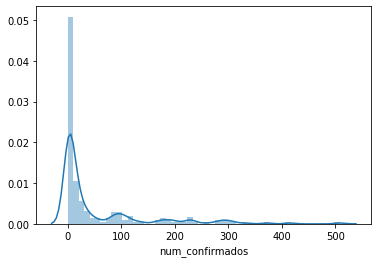

In [2]:
sns.distplot(dset_paises['num_confirmados'])

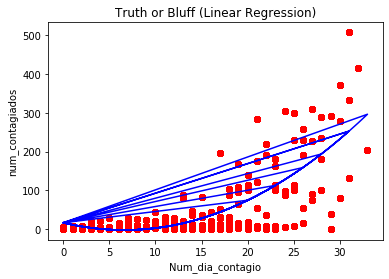

In [16]:
X = dset_paises.iloc[:,0:1].values
y = dset_paises.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Num_dia_contagio')
    plt.ylabel('num_contagiados')
    plt.show()
    return
viz_polymonial()

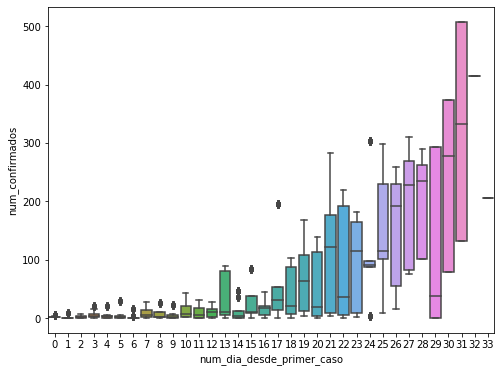

In [17]:
var = 'num_dia_desde_primer_caso'
data = pd.concat([dset_paises['num_confirmados'], dset_paises[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="num_confirmados", data=data)

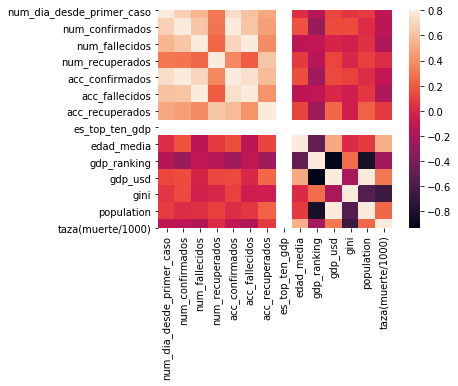

In [18]:
corrmat = dset_paises.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True);

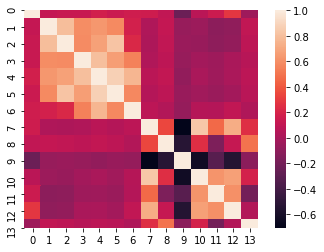

In [19]:
mm_scaler = preprocessing.MinMaxScaler()
dset_ = dset.drop("pais",axis=1)
dset_ = dset_.drop("region",axis=1)
nd_scaled_ds = mm_scaler.fit_transform(dset_)
scaled_ds = pd.DataFrame(nd_scaled_ds)
corrmat = scaled_ds.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True);


In [112]:
dset.corr()

,num_dia_desde_primer_caso,num_confirmados,num_fallecidos,num_recuperados,acc_confirmados,acc_fallecidos,acc_recuperados,es_top_ten_gdp,edad_media,gdp_ranking,gdp_usd,gini,population,taza(muerte/1000)
num_dia_desde_primer_caso,1.000000,0.118743,0.127595,0.131781,0.178018,0.143771,0.161590,0.157933,0.101574,-0.239313,0.079449,0.148499,0.283472,-0.034904
num_confirmados,0.118743,1.000000,0.795275,0.596778,0.638927,0.584723,0.181682,0.029195,0.117300,-0.062922,-0.040931,-0.106842,-0.088757,0.102595
num_fallecidos,0.127595,0.795275,1.000000,0.591655,0.679262,0.825619,0.225150,0.023012,0.103944,-0.047414,-0.058850,-0.099446,-0.078123,0.087643
num_recuperados,0.131781,0.596778,0.591655,1.000000,0.800835,0.664458,0.549704,0.036700,0.086654,-0.061601,-0.015592,-0.037580,0.009943,0.065406
acc_confirmados,0.178018,0.638927,0.679262,0.800835,1.000000,0.874395,0.762410,0.075799,0.108107,-0.086663,0.009436,-0.032245,0.018526,0.082999
acc_fallecidos,0.143771,0.584723,0.825619,0.664458,0.874395,1.000000,0.576518,0.047495,0.090971,-0.056636,-0.024436,-0.048608,-0.018381,0.071735
acc_recuperados,0.161590,0.181682,0.225150,0.549704,0.762410,0.576518,1.000000,0.083095,0.045405,-0.071604,0.055435,0.049626,0.102851,0.028352
es_top_ten_gdp,0.157933,0.029195,0.023012,0.036700,0.075799,0.047495,0.083095,1.000000,0.343038,-0.707237,0.837386,0.465899,0.726041,0.248569
edad_media,0.101574,0.117300,0.103944,0.086654,0.108107,0.090971,0.045405,0.343038,1.000000,-0.528339,0.252896,-0.160609,0.126338,0.494659
gdp_ranking,-0.239313,-0.062922,-0.047414,-0.061601,-0.086663,-0.056636,-0.071604,-0.707237,-0.528339,1.000000,-0.630689,-0.318563,-0.544513,-0.113302


## Extracción de características

In [138]:
from sklearn.preprocessing import PolynomialFeatures

degree = 6
def ajuste_polinomial(X, y):
    """
    X es el dia que ha transcurrido desde el primer contagio
    y es el numero de contagiados, fallecidos y/o recuperados
    """
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)
    features = pd.Series(poly_reg.transform(X)[-1])
    # print(features)
    return features

features_df = dset_base.groupby(['region', 'pais']).apply(lambda x: ajuste_polinomial(x.iloc[:,0:1].values, x['num_confirmados'].values)).reset_index()
features_df.head()

,region,pais,0,1,2,3,4,5,6
0,"Montreal, QC",Canada,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0
1,"Norfolk County, MA",US,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0
2,Alabama,US,1.0,21.0,441.0,9261.0,194481.0,4084101.0,85766121.0
3,"Alameda County, CA",US,1.0,2.0,4.0,8.0,16.0,32.0,64.0
4,Alaska,US,1.0,24.0,576.0,13824.0,331776.0,7962624.0,191102976.0


## TSNE projection

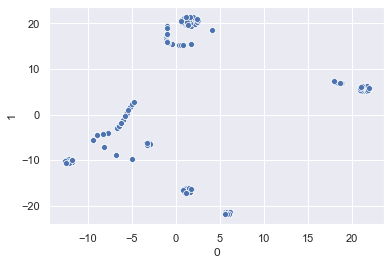

In [192]:
from sklearn.manifold import TSNE
features = features_df.select_dtypes('float64')
X_embedded = TSNE(n_components=2).fit_transform(features)
X_embedded = pd.DataFrame(X_embedded)
ax_tsne = sns.scatterplot(x=0, y=1, data = pd.DataFrame(X_embedded))
ax_tsne.grid(True)

## Clustering

In [193]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
n_cluster = 3
kmeans_clusters = KMeans(n_clusters=n_cluster).fit_predict(features)
agglomerative_clusters = AgglomerativeClustering().fit_predict(features)
dbscan_clusters = DBSCAN(eps=0.3, min_samples=10).fit_predict(features)

Cluster -1 has 100 country/region
Cluster 0 has 11 country/region
Cluster 1 has 30 country/region
Cluster 2 has 48 country/region
Cluster 3 has 34 country/region
Cluster 4 has 23 country/region
Cluster 5 has 22 country/region
Cluster 6 has 32 country/region


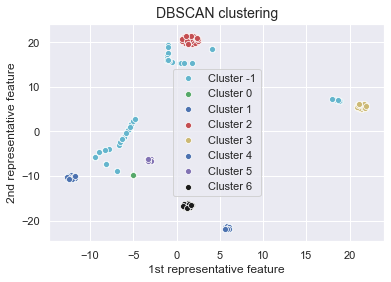

In [195]:
color_map = {
    -1: 'c',
    0: 'g',
    1: 'b',
    2: 'r',
    3: 'y',
    4: 'b',
    5: 'm',
    6: 'k'
}

def plot_clustering(clusters, name=''):

    for cluster in np.unique(clusters):
        print('Cluster {} has {} country/region'.format(cluster, features_df[clusters == cluster][['pais', 'region']].shape[0]))
        ax = sns.scatterplot(x=0, y=1, data = X_embedded[clusters == cluster], color =color_map[cluster], label='Cluster '+str(cluster))

    ax.grid(True)
    ax.set_title(name+' clustering', fontsize=14)
    ax.set_xlabel('1st representative feature')
    ax.set_ylabel('2nd representative feature')
    return ax

plot_clustering(dbscan_clusters, name='DBSCAN')

Cluster 0 has 257 country/region
Cluster 1 has 34 country/region
Cluster 2 has 9 country/region


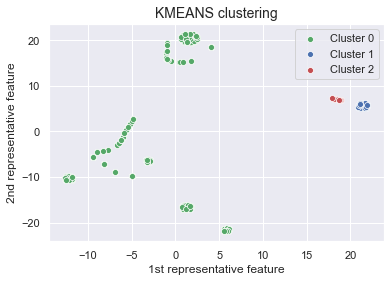

In [196]:
plot_clustering(kmeans_clusters, name='KMEANS')

Cluster 0 has 43 country/region
Cluster 1 has 257 country/region


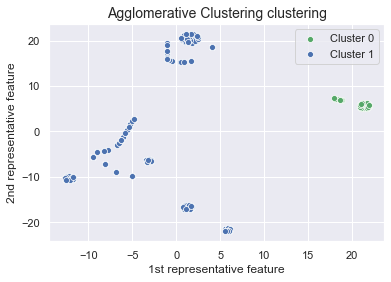

In [197]:
plot_clustering(agglomerative_clusters, name='Agglomerative Clustering')

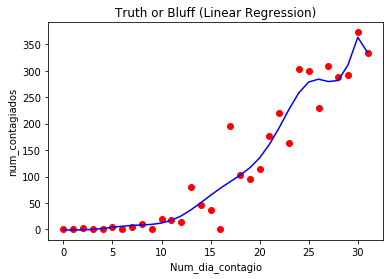

In [55]:
selected_pais = "Chile" #"South Korea"
dset_pais = dset_base[dset_base["pais"]==selected_pais]
X = dset_pais.iloc[:,0:1].values
y = dset_pais.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=12)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Num_dia_contagio')
    plt.ylabel('num_contagiados')
    plt.show()
    return
viz_polymonial()

In [109]:
dset_weather = pd.read_csv('training_data_with_weather_info_week_4.csv',)
dset_weather.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [135]:
mm_scaler = preprocessing.MinMaxScaler()
dset_ = dset_weather.drop("Country_Region",axis=1)
dset_ = dset_.drop("Province_State",axis=1)
dset_ = dset_.drop("country+province",axis=1)
dset_['Date'] = pd.to_datetime(dset_['Date']).dt.dayofyear
dset_ = dset_.drop("ah",axis=1)
dset_.head()

,Id,Date,ConfirmedCases,Fatalities,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,wdsp,prcp,fog
0,1,22,0.0,0.0,33.0,65.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,9.4,0.00,0
1,2,23,0.0,0.0,33.0,65.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,14.9,99.99,1
2,3,24,0.0,0.0,33.0,65.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,10.4,0.17,1
3,4,25,0.0,0.0,33.0,65.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,6.1,0.57,1
4,5,26,0.0,0.0,33.0,65.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,10.8,0.00,1


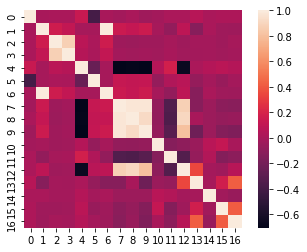

In [136]:
nd_scaled_ds = mm_scaler.fit_transform(dset_)
scaled_ds = pd.DataFrame(nd_scaled_ds)
corrmat = scaled_ds.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True);



In [137]:
corrmat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,2.269885e-03,0.009576,0.009073,1.312925e-01,-3.974216e-01,2.269885e-03,-0.016198,0.008250,-0.032108,-0.013409,0.017464,0.019379,0.063927,0.007920,0.024505,0.023712
1,0.002270,1.000000e+00,0.153798,0.107640,5.513333e-18,3.042254e-18,1.000000e+00,0.140380,0.120209,0.153594,-0.003950,-0.075761,0.088401,-0.124973,0.013000,-0.026541,-0.034858
2,0.009576,1.537980e-01,1.000000,0.875224,8.021522e-02,1.777906e-02,1.537980e-01,-0.033467,-0.040629,-0.031394,-0.030912,-0.001880,-0.032587,-0.009383,-0.012199,-0.028246,-0.001298
3,0.009073,1.076396e-01,0.875224,1.000000,5.783230e-02,9.964107e-03,1.076396e-01,-0.017781,-0.025118,-0.018623,-0.022873,0.002270,-0.021059,-0.013770,-0.011410,-0.020497,-0.008636
4,0.131292,5.513333e-18,0.080215,0.057832,1.000000e+00,-2.490610e-01,5.513333e-18,-0.706071,-0.689925,-0.700343,0.048328,0.176117,-0.657141,0.019891,0.047203,0.076911,0.051232
5,-0.397422,3.042254e-18,0.017779,0.009964,-2.490610e-01,1.000000e+00,3.042254e-18,0.123452,0.110048,0.116842,-0.072005,0.040065,0.072947,-0.071145,-0.011799,-0.055100,-0.012631
6,0.002270,1.000000e+00,0.153798,0.107640,5.513333e-18,3.042254e-18,1.000000e+00,0.140380,0.120209,0.153594,-0.003950,-0.075761,0.088401,-0.124973,0.013000,-0.026541,-0.034858
7,-0.016198,1.403803e-01,-0.033467,-0.017781,-7.060711e-01,1.234520e-01,1.403803e-01,1.000000,0.975811,0.975786,-0.075479,-0.344268,0.877573,-0.125855,-0.042467,-0.103504,-0.115342
8,0.008250,1.202093e-01,-0.040629,-0.025118,-6.899246e-01,1.100482e-01,1.202093e-01,0.975811,1.000000,0.921532,-0.085538,-0.356578,0.912799,0.002074,-0.043557,-0.066632,-0.054326
9,-0.032108,1.535936e-01,-0.031394,-0.018623,-7.003427e-01,1.168423e-01,1.535936e-01,0.975786,0.921532,1.000000,-0.067732,-0.313151,0.812722,-0.224721,-0.042753,-0.134578,-0.154757
